# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer
### first project 
* 
read the housing dataset and show the first 5 linef 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit


#### read the data saved on the same location and display it 

In [2]:

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
data.head()


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


* gathering all information about dataset
* 1- type of all data
* shape of the data
* read the statistics of this data
* read the statistic of the MEDV feature and see if they are any outliers or missing values

In [3]:
# 1- type of all data
print("Data Types:\n")
print(data.dtypes)

print("\n" + "="*50)

# 2- print the shape of your data
print("Shape of the dataset:")
print(data.shape)

print("\n" + "="*50)

# 3- display the basic statistics
print("Basic Statistics:\n")
print(data.describe())

print("\n" + "="*50)

# 4- display statistics of prediction column (MEDV)
print("Statistics of MEDV column:\n")
print(data['MEDV'].describe())

print("\n" + "="*50)

print("Missing values in each column:\n")
print(data.isnull().sum())

#Min / MAX
print("Check possible outliers in MEDV:")
print("Min:", data['MEDV'].min())
print("Max:", data['MEDV'].max())



Data Types:

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

Shape of the dataset:
(489, 4)

Basic Statistics:

               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06

Statistics of MEDV column:

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

Missing values in each column:

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64
Check possi

* on the code below i assign new var for the prediction column and drop it from original dataset
* i assigne the prediction column as a price and other column as a features data

In [4]:
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
# print the shape of the data
print('Boston housing dataset has {0} data points with {1} variables each.'.format(*data.shape))


Boston housing dataset has 489 data points with 4 variables each.


The MEDV column was separated as the target variable (prices).
The remaining columns were assigned as features for model training.

## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. 
* The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point.
*  The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

In [5]:
print("Feature columns:")
print(features.columns)

print("\nFirst 5 rows of features:")
display(features.head())

print("\nFirst 5 values of prices:")
display(prices.head())


Feature columns:
Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object')

First 5 rows of features:


,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7



First 5 values of prices:


0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

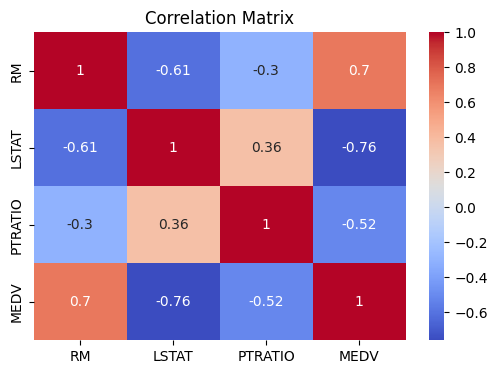

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


RM shows a strong positive correlation with house prices.
LSTAT shows a strong negative correlation with house prices.
PTRATIO has a moderate negative correlation.
These relationships suggest that the selected features are meaningful predictors.

The correlation matrix shows that RM has a strong positive correlation with house prices (0.70), indicating that houses with more rooms tend to be more expensive.
LSTAT has a strong negative correlation (-0.76), suggesting that areas with a higher percentage of lower income population tend to have lower house prices.
PTRATIO shows a moderate negative correlation (-0.52).

### Implementation: Calculate Statistics
***
***


* claculate the statistics for the code below
* get the minimum  and the max of the price data
* get the mean
* get the median
* get the mode
* calculate the std
- need to print the data 

In [7]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Mode price of the data
mode_price = prices.mode()[0]

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price: ${:,.2f}".format(median_price))
print("Mode price: ${:,.2f}".format(mode_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price: $438,900.00
Mode price: $525,000.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**


## ** answer the question below **
## your answer will reflect your understand


**Hint:** This problem can phrased using examples like below.  


* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?


* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?


* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

If a home has an RM value of 7, it would likely be worth more than a home with an RM value of 6.
This is because a higher number of rooms generally indicates a larger and more spacious house, which increases its value.

If a neighborhood has an LSTAT value of 20, its home prices would likely be worth less than a neighborhood with an LSTAT value of 15.
A higher percentage of lower-income residents is typically associated with lower property values.

If a neighborhood has a PTRATIO value of 15, its home prices would likely be worth less than a neighborhood with a PTRATIO value of 10.
A lower student-to-teacher ratio usually indicates better education quality, which makes the neighborhood more attractive and increases house prices.

********************************

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

## takecare for this part to focus for every stage

*****************************
**************************

*****************************************
********************************************

## R2 Score

### Implementation: Define a Performance Metric
- It is difficult to measure the quality of a given model without quantifying its performance over training and testing.
- This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement.
-  For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance.
-  The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 
******************************************


The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. 
************************************
A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. 

Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable.

******************************************
For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [8]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_test, y_predict):
    """ Calculates and returns the performance score between 
        test and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_test' and 'y_predict'
    score = r2_score(y_test, y_predict)
    
    # Return the score
    return score


### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [9]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

### **Answer:**



Yes, the model has successfully captured the variation of the target variable.

The R² score is approximately 0.923, which means that about 92.3% of the variance in the true values is explained by the model predictions.

Since the R² value is very close to 1, this indicates that the model performs very well and makes accurate predictions.

### Implementation: Shuffle and Split Data
- Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets.
-  Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [10]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [11]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (391, 3)
Testing set size: (98, 3)


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

### **Answer: **


Splitting the dataset into training and testing subsets helps evaluate how well a model generalizes to unseen data.

The training set is used to train the model, while the testing set is used to evaluate its performance on new data that the model has not seen before. This helps detect problems such as overfitting and underfitting.

If a model performs very well on the training data but poorly on the testing data, it is likely overfitting — meaning it memorized the training data instead of learning general patterns.
On the other hand, if it performs poorly on both training and testing data, it may be underfitting — meaning it failed to capture the underlying structure of the data.

Therefore, splitting the data ensures a more reliable and realistic evaluation of the model’s predictive performance.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

In [12]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeRegressor

# Suppress matplotlib user warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

def ModelLearning(X, y):
    """Calculates the performance of several models with varying sizes of training data.
       The learning and testing scores for each model are then plotted."""
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0] * 0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig, axes = plt.subplots(2, 2, figsize=(10, 7))

    # Create four different models based on max_depth
    for k, depth in enumerate([1, 3, 6, 10]):
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth=depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(
            regressor, X, y, cv=cv, train_sizes=train_sizes, scoring='r2'
        )
        
        # Find the mean and standard deviation for smoothing
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Subplot the learning curve 
        ax = axes[k//2, k%2]
        ax.plot(sizes, train_mean, 'o-', color='r', label='Training Score')
        ax.plot(sizes, test_mean, 'o-', color='g', label='Testing Score')
        ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
        ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
        
        # Labels
        ax.set_title(f'max_depth = {depth}')
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0] * 0.8])
        ax.set_ylim([-0.05, 1.05])
        ax.legend(loc='lower right')
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=16, y=1.03)
    fig.tight_layout()
    plt.show()



c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\maria\AppData\Local\Programs\Python\Python3

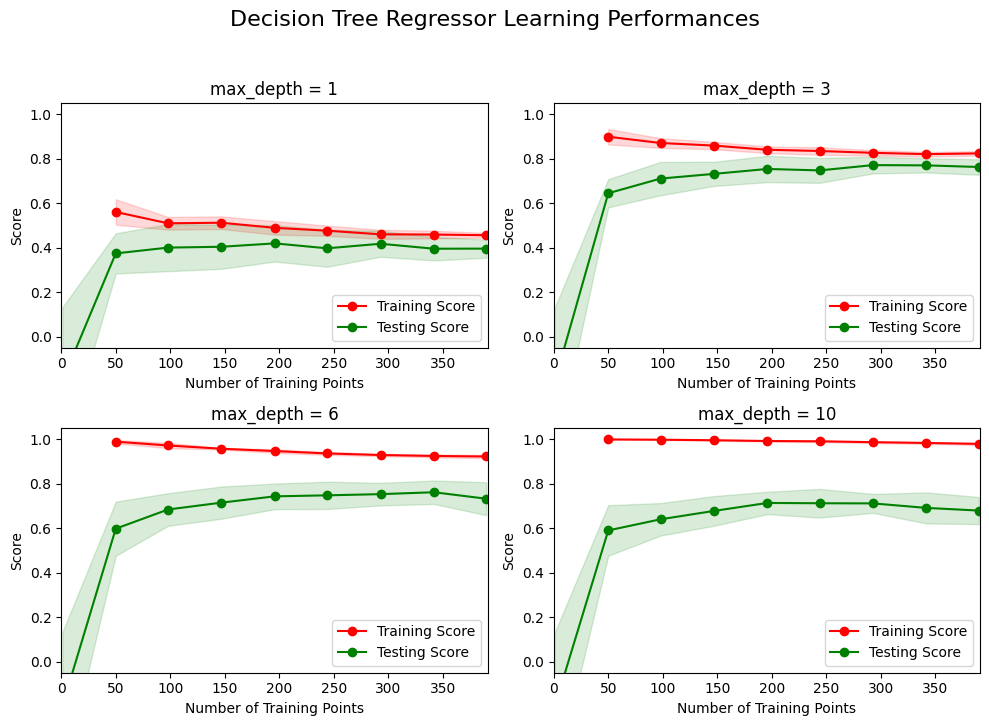

In [13]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

### **Answer: ** 
I will analyze the graph with max_depth = 3.

As more training points are added, the training score slightly decreases and stabilizes, while the testing score gradually increases and then levels off. The two curves begin to converge as the number of training points increases.

This convergence indicates that the model is generalizing well and is not significantly overfitting or underfitting. Since both curves stabilize around relatively high R² values (around 0.75–0.80), the model achieves good performance.

Adding more training points may slightly improve the model performance at first, but once the curves converge and stabilize, additional data may not significantly improve the model. Therefore, while more data is generally beneficial, in this case the benefit becomes marginal after convergence.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

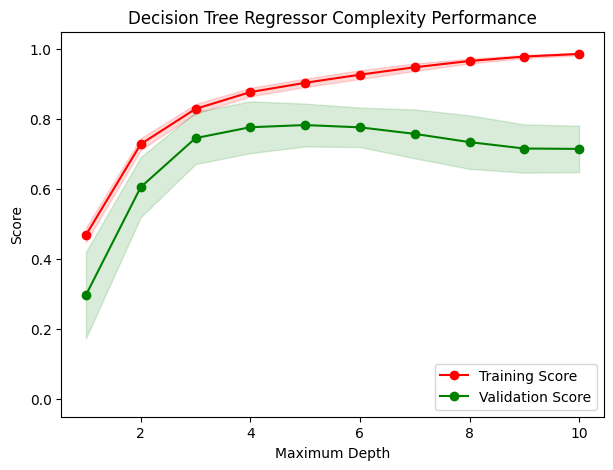

In [14]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

### **Answer: **
When the model is trained with a maximum depth of 1, it suffers from high bias.
This is because both the training and validation scores are low and close to each other. The model is too simple to capture the underlying patterns in the data, which indicates underfitting.

When the model is trained with a maximum depth of 10, it suffers from high variance.
In this case, the training score is very high (close to 1), while the validation score is significantly lower. This large gap between the training and validation curves indicates that the model is overfitting the training data and does not generalize well to unseen data.

The visual cue supporting this conclusion is:

For depth = 1 -> low and close curves -> underfitting -> high bias.

For depth = 10 -> large gap between training and validation -> overfitting -> high variance.


### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

### **Answer: **
The maximum depth that best generalizes to unseen data is approximately 3 (or possibly 4).

From the complexity graph, the validation score increases as the depth increases up to around depth = 3 or 4. After this point, the validation score begins to decrease, even though the training score continues to increase. This indicates that the model starts to overfit when the depth becomes too large.

The intuition behind this choice is that we want the model to achieve the highest validation score while keeping the model as simple as possible. According to Occam’s Razor, we should prefer the simplest model that performs well. A depth of 3 provides strong validation performance without unnecessary complexity, making it the best balance between bias and variance.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

###   **Answer: **
K-fold cross-validation is a model evaluation technique where the dataset is divided into k equal-sized subsets (folds). The model is trained and tested k times.

In each iteration:

One fold is used as the validation (testing) set.

The remaining (k−1) folds are used as the training set.

This process is repeated k times, each time using a different fold as the validation set.

The final performance is calculated as the average of the k results.

Here, k represents the number of folds. For example, if k = 5, the dataset is split into 5 parts, and the model is trained and evaluated 5 times.

Additionally, k-fold cross-validation improves the reliability of grid search when optimizing a model. Instead of evaluating hyperparameters on a single train/test split, the model is evaluated across multiple folds. This reduces the risk of selecting parameters that perform well on only one specific split of the data. By averaging performance across k different splits, grid search provides a more stable and unbiased estimate of model performance.


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [16]:
# Import required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create dictionary for max_depth from 1 to 10
    params = {'max_depth': range(1, 11)}

    # Transform performance_metric into a scoring function
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(estimator=regressor,
                        param_grid=params,
                        scoring=scoring_fnc,
                        cv=cv_sets)

    # Fit the grid search object
    grid = grid.fit(X, y)

    # Return best model
    return grid.best_estimator_


In [17]:
reg = fit_model(X_train, y_train)

print("Parameter 'max_depth' is {} for the optimal model."
      .format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 6 for the optimal model.


### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [20]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))


Parameter 'max_depth' is 6 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

### **Answer: ** 
The optimal model found by GridSearchCV has a maximum depth of 6.

In Question 6, I predicted that a maximum depth of around 3 (or possibly 4) would provide the best generalization based on visual inspection of the complexity curve. While depth 3 appeared to provide a good balance between bias and variance, the grid search results show that depth 6 achieves the highest average cross-validation score.

This difference highlights that although visual analysis provides a good intuition, systematic optimization using cross-validation and grid search can identify a slightly better-performing model.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [21]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $302,400.00
Predicted selling price for Client 2's home: $284,200.00
Predicted selling price for Client 3's home: $933,975.00


c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### **Answer: **  
Using the optimized decision tree model, the predicted selling prices for the three clients are approximately:

Client 1: $302,400.00

Client 2: $284,200.00

Client 3: $933,975.00

These results seem reasonable based on the feature values.

Client 3 has the highest predicted price because the house has the largest number of rooms, the lowest neighborhood poverty rate, and a favorable student-teacher ratio. These factors positively influence home value.

Client 2 has the lowest predicted price because the house has fewer rooms, a higher poverty level, and a higher student-teacher ratio, which negatively impact property value.

Client 1 falls between the two, which is consistent with the moderate feature values.

The predictions align with the relationships observed earlier in the correlation analysis, where:

Higher RM increases price.

Higher LSTAT decreases price.

Higher PTRATIO decreases price.